In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'GCP-Coupons-Instructions.rtf', 'test.csv']


In [2]:
train_data=pd.read_csv('../input/train.csv',nrows=10_000_000)
train_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
train_data.shape

(10000000, 8)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: float64(5), int64(1), object(2)
memory usage: 610.4+ MB


In [5]:
test_data=pd.read_csv('../input/test.csv')
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.2+ KB


In [7]:
train_data.isna().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64

In [8]:
train_data['Difference_longitude']=np.abs(np.asarray(train_data['pickup_longitude']-train_data['dropoff_longitude']))
train_data['Difference_latitude']=np.abs(np.asarray(train_data['pickup_latitude']-train_data['dropoff_latitude']))


test_data['Difference_longitude']=np.abs(np.asarray(test_data['pickup_longitude']-test_data['dropoff_longitude']))
test_data['Difference_latitude']=np.abs(np.asarray(test_data['pickup_latitude']-test_data['dropoff_latitude']))

In [9]:
train_data.isna().sum()

key                      0
fare_amount              0
pickup_datetime          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude       69
dropoff_latitude        69
passenger_count          0
Difference_longitude    69
Difference_latitude     69
dtype: int64

In [10]:
print(f'Before Dropping null values: {len(train_data)}')
train_data.dropna(inplace=True)
print(f'After Dropping null values: {len(train_data)}')

Before Dropping null values: 10000000
After Dropping null values: 9999931


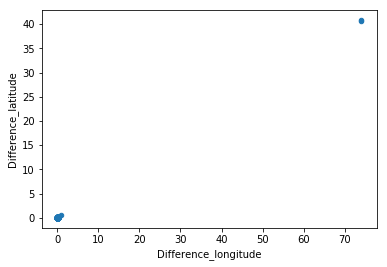

In [11]:
plot = train_data[:2000].plot.scatter('Difference_longitude', 'Difference_latitude')

In [12]:
train_data=train_data[(train_data['Difference_longitude']<5.0)&(train_data['Difference_latitude']<5.0)]

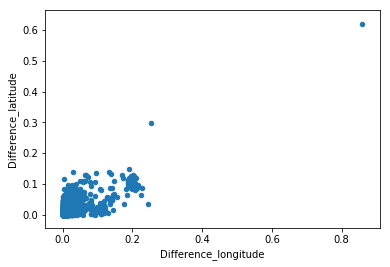

In [13]:
train_data[:2000].plot.scatter('Difference_longitude','Difference_latitude')

In [14]:
ls1=list(train_data['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][11:-7:]
train_data['pickuptime']=ls1    



ls1=list(test_data['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][11:-7:]
test_data['pickuptime']=ls1   

In [15]:
ls1=list(train_data['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][:-4:]
    ls1[i]=pd.Timestamp(ls1[i])
    ls1[i]=ls1[i].weekday()
train_data['Weekday']=ls1


ls1=list(test_data['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][:-4:]
    ls1[i]=pd.Timestamp(ls1[i])
    ls1[i]=ls1[i].weekday()
test_data['Weekday']=ls1

In [16]:
train_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime,Weekday
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51,1


In [17]:
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime,Weekday
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,0.008110,0.019970,13:08,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,0.012024,0.019817,13:08,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.002870,0.005121,11:53,5
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,0.009288,0.016172,21:12,5
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,0.022519,0.045348,21:12,5


In [18]:
train_data.drop('pickup_datetime',inplace=True,axis=1)
test_data.drop('pickup_datetime',inplace=True,axis=1)

In [19]:
train_data['Weekday'].replace(to_replace=[i for i in range(0,7)],
                            value=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                              inplace=True)
test_data['Weekday'].replace(to_replace=[i for i in range(0,7)],
                              value=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                              inplace=True)

In [20]:
train_one_hot=pd.get_dummies(train_data['Weekday'])
test_one_hot=pd.get_dummies(test_data['Weekday'])
train_data=pd.concat([train_data,train_one_hot],axis=1)
test_data=pd.concat([test_data,test_one_hot],axis=1)

In [21]:
#train_data['Weekday']+=1
#test_data['Weekday']+=1

In [22]:
test_data.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime,Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1,0.008110,0.019970,13:08,Tuesday,0,0,0,0,0,1,0
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1,0.012024,0.019817,13:08,Tuesday,0,0,0,0,0,1,0
2,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1,0.002870,0.005121,11:53,Saturday,0,0,1,0,0,0,0
3,2012-12-01 21:12:12.0000002,-73.981160,40.767807,-73.990448,40.751635,1,0.009288,0.016172,21:12,Saturday,0,0,1,0,0,0,0
4,2012-12-01 21:12:12.0000003,-73.966046,40.789775,-73.988565,40.744427,1,0.022519,0.045348,21:12,Saturday,0,0,1,0,0,0,0


In [23]:
ls1=list(train_data['pickuptime'])
for i in range(len(ls1)):
    z=ls1[i].split(':')
    ls1[i]=int(z[0])*100+int(z[1])
train_data['pickuptime']=ls1


ls1=list(test_data['pickuptime'])
for i in range(len(ls1)):
    z=ls1[i].split(':')
    ls1[i]=int(z[0])*100+int(z[1])
test_data['pickuptime']=ls1

In [24]:
R = 6373.0
lat1 =np.asarray(np.radians(train_data['pickup_latitude']))
lon1 = np.asarray(np.radians(train_data['pickup_longitude']))
lat2 = np.asarray(np.radians(train_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_data['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
ls1=[] 
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c

    
train_data['Distance']=np.asarray(distance)*0.621



lat1 =np.asarray(np.radians(test_data['pickup_latitude']))
lon1 = np.asarray(np.radians(test_data['pickup_longitude']))
lat2 = np.asarray(np.radians(test_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_data['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
 
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
test_data['Distance']=np.asarray(distance)*0.621

Latitude: 40.6413111
 Longitude: -73.7781391 
Of John F Kennedy Airport

Latitude:40.7484 Longitude:-73.9857 of New York Empire State Buliding

In [25]:
R = 6373.0
lat1 =np.asarray(np.radians(train_data['pickup_latitude']))
lon1 = np.asarray(np.radians(train_data['pickup_longitude']))
lat2 = np.asarray(np.radians(train_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_data['dropoff_longitude']))

lat3=np.zeros(len(train_data))+np.radians(40.6413111)
lon3=np.zeros(len(train_data))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
train_data['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
train_data['Dropoff_Distance_airport']=np.asarray(distance2)*0.621



lat1 =np.asarray(np.radians(test_data['pickup_latitude']))
lon1 = np.asarray(np.radians(test_data['pickup_longitude']))
lat2 = np.asarray(np.radians(test_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_data['dropoff_longitude']))

lat3=np.zeros(len(test_data))+np.radians(40.6413111)
lon3=np.zeros(len(test_data))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
test_data['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
test_data['Dropoff_Distance_airport']=np.asarray(distance2)*0.621

In [26]:
test_data.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime,Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Distance,Pickup_Distance_airport,Dropoff_Distance_airport
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1,0.008110,0.019970,1308,Tuesday,0,0,0,0,0,1,0,1.443197,13.268494,12.787047
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1,0.012024,0.019817,1308,Tuesday,0,0,0,0,0,1,0,1.506617,12.191063,13.393626
2,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1,0.002870,0.005121,1153,Saturday,0,0,1,0,0,0,0,0.384289,13.124241,12.798891
3,2012-12-01 21:12:12.0000002,-73.981160,40.767807,-73.990448,40.751635,1,0.009288,0.016172,2112,Saturday,0,0,1,0,0,0,0,1.218183,13.760833,13.479426
4,2012-12-01 21:12:12.0000003,-73.966046,40.789775,-73.988565,40.744427,1,0.022519,0.045348,2112,Saturday,0,0,1,0,0,0,0,3.346564,14.210816,13.121913


In [27]:
R = 6373.0
lat1 =np.asarray(np.radians(train_data['pickup_latitude']))
lon1 = np.asarray(np.radians(train_data['pickup_longitude']))
lat2 = np.asarray(np.radians(train_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_data['dropoff_longitude']))

lat3=np.zeros(len(train_data))+np.radians(40.7484)
lon3=np.zeros(len(train_data))+np.radians(-73.9857)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
train_data['Pickup_Distance_State_Building']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
train_data['Dropoff_Distance_State_Building']=np.asarray(distance2)*0.621



lat1 =np.asarray(np.radians(test_data['pickup_latitude']))
lon1 = np.asarray(np.radians(test_data['pickup_longitude']))
lat2 = np.asarray(np.radians(test_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_data['dropoff_longitude']))

lat3=np.zeros(len(test_data))+np.radians(40.7484)
lon3=np.zeros(len(test_data))+np.radians(-73.9857)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
test_data['Pickup_Distance_State_Building']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
test_data['Dropoff_Distance_State_Building']=np.asarray(distance2)*0.621

In [28]:
train_data.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','Weekday'],
               axis=1,inplace=True)
test_data.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','Weekday'],
               axis=1,inplace=True)

In [29]:
train_data['Distance']=np.round(train_data['Distance'],2)
train_data['Pickup_Distance_airport']=np.round(train_data['Pickup_Distance_airport'],2)
train_data['Dropoff_Distance_airport']=np.round(train_data['Dropoff_Distance_airport'],2)
train_data['Pickup_Distance_State_Building']=np.round(train_data['Pickup_Distance_State_Building'],2)
train_data['Dropoff_Distance_State_Building']=np.round(train_data['Dropoff_Distance_State_Building'],2)
test_data['Distance']=np.round(test_data['Distance'],2)
test_data['Pickup_Distance_airport']=np.round(test_data['Pickup_Distance_airport'],2)
test_data['Dropoff_Distance_airport']=np.round(test_data['Dropoff_Distance_airport'],2)
test_data['Pickup_Distance_State_Building']=np.round(test_data['Pickup_Distance_State_Building'],2)
test_data['Dropoff_Distance_State_Building']=np.round(test_data['Dropoff_Distance_State_Building'],2)

In [30]:
train_data.shape

(9979187, 18)

In [31]:
test_data.shape

(9914, 17)

In [32]:
train_data['Difference_longitude']=np.abs(train_data['Difference_longitude']-np.mean(train_data['Difference_longitude']))
train_data['Difference_longitude']=train_data['Difference_longitude']/np.var(train_data['Difference_longitude'])

In [33]:
train_data['Difference_latitude']=np.abs(train_data['Difference_latitude']-np.mean(train_data['Difference_latitude']))
train_data['Difference_latitude']=train_data['Difference_latitude']/np.var(train_data['Difference_latitude'])

In [34]:
test_data['Difference_longitude']=np.abs(test_data['Difference_longitude']-np.mean(test_data['Difference_longitude']))
test_data['Difference_longitude']=test_data['Difference_longitude']/np.var(test_data['Difference_longitude'])

test_data['Difference_latitude']=np.abs(test_data['Difference_latitude']-np.mean(test_data['Difference_latitude']))
test_data['Difference_latitude']=test_data['Difference_latitude']/np.var(test_data['Difference_latitude'])

The night time surcharge is 50 cents for rides from 8 p.m. until 6 a.m.

The peak hour weekday surcharge is $1 and is charged for rides from 4 to 8 p.m. weekdays.

In [35]:
train_data.shape

(9979187, 18)

In [36]:
test_data.shape

(9914, 17)

In [37]:
from sklearn.model_selection import train_test_split
X=train_data.drop(['key','fare_amount'],axis=1)
y=train_data['fare_amount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=80)

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))

0.617952560336394


In [39]:
from keras.layers import Dense,Activation,BatchNormalization,Dropout
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [40]:
adam=Adam(lr=0.25,beta_1=0.9,beta_2=0.99,epsilon=1e-7)

In [41]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9879395, 16) (9879395,)
(99792, 16) (99792,)


In [42]:
model=Sequential()
model.add(Dense(128,input_shape=(16,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dense(16))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Dense(8))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Dense(4))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Dense(2))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

model=Sequential()
model.add(Dense(50,input_shape=(14,)))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(1))
model.summary()

In [43]:
model.compile(optimizer=adam,loss='mse',metrics=['mse'])

In [44]:
train=model.fit(x=X_train,y=y_train,batch_size=256,epochs=10,verbose=2,validation_data=(X_test,y_test))

Train on 9879395 samples, validate on 99792 samples
Epoch 1/10
 - 580s - loss: 27.8724 - mean_squared_error: 27.8724 - val_loss: 30.9299 - val_mean_squared_error: 30.9299
Epoch 2/10
 - 575s - loss: 26.1713 - mean_squared_error: 26.1713 - val_loss: 24.6321 - val_mean_squared_error: 24.6321
Epoch 3/10
 - 581s - loss: 25.7580 - mean_squared_error: 25.7580 - val_loss: 26.3954 - val_mean_squared_error: 26.3954
Epoch 4/10
 - 577s - loss: 25.4966 - mean_squared_error: 25.4966 - val_loss: 25.6924 - val_mean_squared_error: 25.6924
Epoch 5/10
 - 585s - loss: 25.3427 - mean_squared_error: 25.3427 - val_loss: 26.7000 - val_mean_squared_error: 26.7000
Epoch 6/10
 - 578s - loss: 25.1403 - mean_squared_error: 25.1403 - val_loss: 25.9220 - val_mean_squared_error: 25.9220
Epoch 7/10
 - 585s - loss: 24.9485 - mean_squared_error: 24.9485 - val_loss: 39.6043 - val_mean_squared_error: 39.6043
Epoch 8/10
 - 586s - loss: 24.8060 - mean_squared_error: 24.8060 - val_loss: 32.6185 - val_mean_squared_error: 32.6

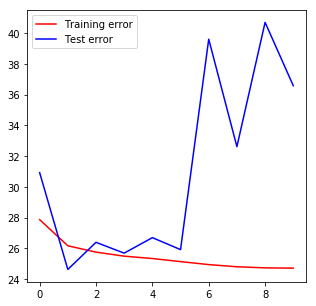

In [45]:
plt.figure(figsize=(5,5))
plt.plot(train.history['mean_squared_error'],'r',label='Training error')
plt.plot(train.history['val_mean_squared_error'],'b',label='Test error')
plt.legend()

In [46]:
pred=np.round(model.predict(test_data.drop('key',axis=1)),2)

In [47]:
pd.read_csv('../input/sample_submission.csv').head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35


In [48]:
Submission=pd.DataFrame(data=pred,columns=['fare_amount'])
Submission['key']=test_data['key']
Submission=Submission[['key','fare_amount']]

In [49]:
Submission['fare_amount']=np.round(Submission['fare_amount'],2)

In [50]:
Submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.96
1,2015-01-27 13:08:24.0000003,11.81
2,2011-10-08 11:53:44.0000002,8.72
3,2012-12-01 21:12:12.0000002,11.30
4,2012-12-01 21:12:12.0000003,13.62


In [51]:
Submission.tail()

,key,fare_amount
9909,2015-05-10 12:37:51.0000002,11.490000
9910,2015-01-12 17:05:51.0000001,12.210000
9911,2015-04-19 20:44:15.0000001,41.650002
9912,2015-01-31 01:05:19.0000005,19.270000
9913,2015-01-18 14:06:23.0000006,10.710000


In [52]:
#Submission.reset_index(inplace=True)
Submission.set_index('key',inplace=True)

In [53]:
Submission.to_csv('Submission.csv')

In [54]:
Submission.head()

,fare_amount
key,
2015-01-27 13:08:24.0000002,11.96
2015-01-27 13:08:24.0000003,11.81
2011-10-08 11:53:44.0000002,8.72
2012-12-01 21:12:12.0000002,11.30
2012-12-01 21:12:12.0000003,13.62
